# Logistic Regression Analysis on Titanic Dataset

### 1. Prepare Data

In [38]:
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np
%matplotlib inline

In [2]:
train = pd.read_csv('datafiles/titanic_train.csv')
test = pd.read_csv('datafiles/titanic_test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print(f"Train shape: {train.shape} \nTest shape: {test.shape}")

Train shape: (891, 12) 
Test shape: (418, 11)


In [6]:
# We only want columns relevant for our logistic regression model to read in. 
keep_cols_train = ['Survived', 'Pclass', 'Sex', 'Age', "Fare"]
keep_cols_test = ['Pclass', 'Sex', 'Age', "Fare"]

Text(0.5, 1.0, 'Test')

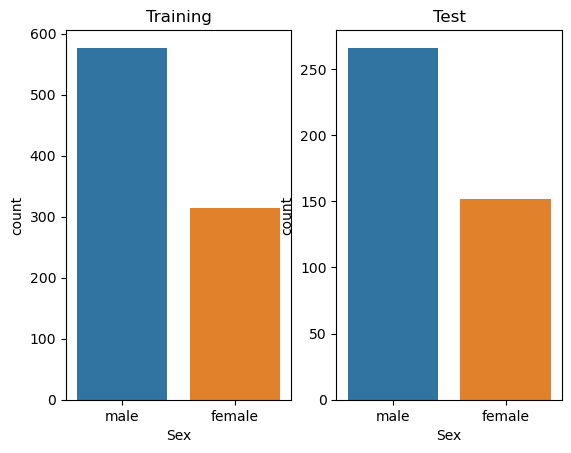

In [11]:
# Visualize what we are working with
fig, ax =plt.subplots(1,2)
sns.countplot(x='Sex', data=train, ax=ax[0])
sns.countplot(x='Sex', data=test, ax=ax[1])
ax[0].set_title("Training")
ax[1].set_title("Test")

Text(0.5, 1.0, 'Test')

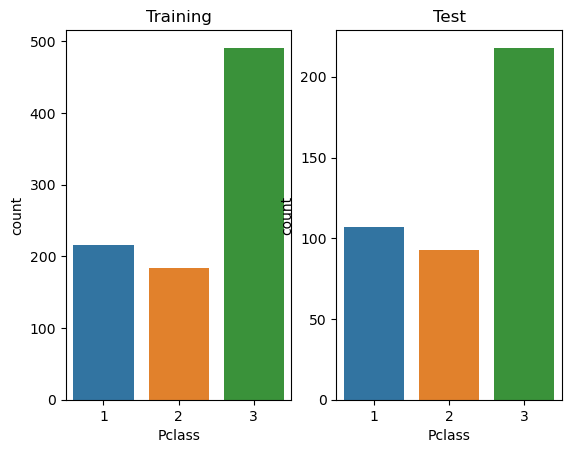

In [12]:
fig, ax =plt.subplots(1,2)
sns.countplot(x='Pclass', data=train, ax=ax[0])
sns.countplot(x='Pclass', data=test, ax=ax[1])
ax[0].set_title("Training")
ax[1].set_title("Test")

Text(0.5, 1.0, 'Test')

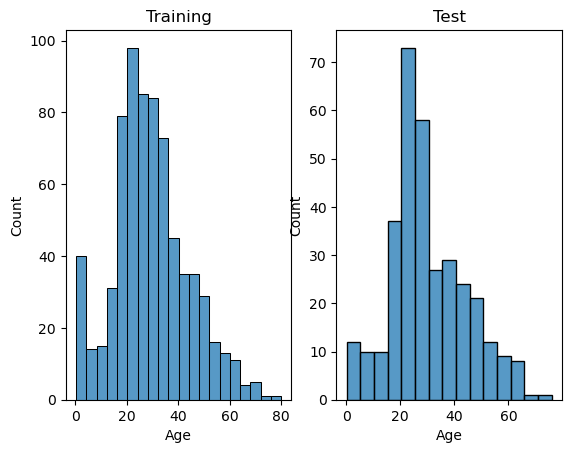

In [13]:
fig, ax =plt.subplots(1,2)
sns.histplot(x='Age', data=train, ax=ax[0])
sns.histplot(x='Age', data=test, ax=ax[1])
ax[0].set_title("Training")
ax[1].set_title("Test")

Text(0.5, 1.0, 'Test')

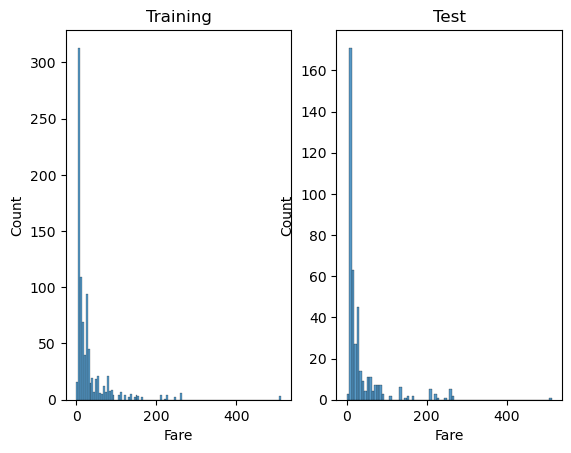

In [14]:
fig, ax =plt.subplots(1,2)
sns.histplot(x='Fare', data=train, ax=ax[0])
sns.histplot(x='Fare', data=test, ax=ax[1])
ax[0].set_title("Training")
ax[1].set_title("Test")

In [15]:
train[keep_cols_train].describe()

,Survived,Pclass,Age,Fare
count,891.000000,891.000000,714.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208
std,0.486592,0.836071,14.526497,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,20.125000,7.910400
50%,0.000000,3.000000,28.000000,14.454200
75%,1.000000,3.000000,38.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


In [19]:
print("Train Set\n")
for ii in keep_cols_train:
    sum_na = train[ii].isna().sum()
    
    print(f"{ii}: {sum_na} # of NaN values.")


    
print("\nTest\n")
for ii in keep_cols_test:
    sum_na = test[ii].isna().sum()
    
    print(f"{ii}: {sum_na} # of NaN values.")

Train Set

Survived: 0 # of NaN values.
Pclass: 0 # of NaN values.
Sex: 0 # of NaN values.
Age: 177 # of NaN values.
Fare: 0 # of NaN values.

Test

Pclass: 0 # of NaN values.
Sex: 0 # of NaN values.
Age: 86 # of NaN values.
Fare: 1 # of NaN values.


In [27]:
train['Age'].fillna(train['Age'].mean(), inplace=True)

test['Age'].fillna(test['Age'].mean(), inplace=True)
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

In [28]:
print("Train Set\n")
for ii in keep_cols_train:
    sum_na = train[ii].isna().sum()
    
    print(f"{ii}: {sum_na} # of NaN values.")
    
    
print("\nTest\n")
for ii in keep_cols_test:
    sum_na = test[ii].isna().sum()
    
    print(f"{ii}: {sum_na} # of NaN values.")

Train Set

Survived: 0 # of NaN values.
Pclass: 0 # of NaN values.
Sex: 0 # of NaN values.
Age: 0 # of NaN values.
Fare: 0 # of NaN values.

Test

Pclass: 0 # of NaN values.
Sex: 0 # of NaN values.
Age: 0 # of NaN values.
Fare: 0 # of NaN values.


In [29]:
train_clean = train[keep_cols_train]
test_clean = test[keep_cols_test]

In [32]:
train_clean.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [33]:
test_clean.head()

,Pclass,Sex,Age,Fare
0,3,male,34.5,7.8292
1,3,female,47.0,7.0000
2,2,male,62.0,9.6875
3,3,male,27.0,8.6625
4,3,female,22.0,12.2875


In [37]:
train_clean = pd.get_dummies(train_clean, columns=["Pclass", "Sex"], drop_first=True)
test_clean = pd.get_dummies(test_clean, columns=["Pclass", "Sex"], drop_first=True)


In [44]:
scaler = StandardScaler()
train_clean["Fare"] = scaler.fit_transform(train_clean[['Fare']])
test_clean["Fare"] = scaler.fit_transform(test_clean[['Fare']])

In [45]:
train_clean.head()

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male
0,0,22.0,-0.502445,0,1,1
1,1,38.0,0.786845,0,0,0
2,1,26.0,-0.488854,0,1,0
3,1,35.0,0.420730,0,0,0
4,0,35.0,-0.486337,0,1,1


In [46]:
test_clean.head()

,Age,Fare,Pclass_2,Pclass_3,Sex_male
0,34.5,-0.498407,0,1,1
1,47.0,-0.513274,0,1,0
2,62.0,-0.465088,1,0,1
3,27.0,-0.483466,0,1,1
4,22.0,-0.418471,0,1,0


### 2. Set Up Model